<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-к-работе" data-toc-modified-id="Подготовка-к-работе-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка к работе</a></span></li><li><span><a href="#Обучение-на-первом-этапе" data-toc-modified-id="Обучение-на-первом-этапе-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение на первом этапе</a></span><ul class="toc-item"><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Деление на выборки</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Построение-алгоритма" data-toc-modified-id="Построение-алгоритма-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение алгоритма</a></span></li></ul></li><li><span><a href="#Удаление-признаков-по-важности-и-с-нессиметричным-распределением" data-toc-modified-id="Удаление-признаков-по-важности-и-с-нессиметричным-распределением-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Удаление признаков по важности и с нессиметричным распределением</a></span><ul class="toc-item"><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Построение-алгоритма" data-toc-modified-id="Построение-алгоритма-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построение алгоритма</a></span></li></ul></li><li><span><a href="#Удаление-мультиколлинеарных-признаков-и-выбросы" data-toc-modified-id="Удаление-мультиколлинеарных-признаков-и-выбросы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Удаление мультиколлинеарных признаков и выбросы</a></span><ul class="toc-item"><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Построение-алгоритма" data-toc-modified-id="Построение-алгоритма-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Построение алгоритма</a></span></li></ul></li><li><span><a href="#Определение-оптимального-количества-кластеров" data-toc-modified-id="Определение-оптимального-количества-кластеров-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Определение оптимального количества кластеров</a></span></li><li><span><a href="#Изменение-количества-кластеров" data-toc-modified-id="Изменение-количества-кластеров-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Изменение количества кластеров</a></span><ul class="toc-item"><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Построение-алгоритма" data-toc-modified-id="Построение-алгоритма-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Построение алгоритма</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Задача

**Задача:** разработать алгоритм, подбирающий для определённого товара набор из пяти похожих на него. Качество алгоритма оценить по метрике accuracy@5

**Предоставленные данные:**

* **base.csv** - анонимизированный набор товаров. Вектор признаков размерностью 72.

* **train.csv** - обучающий датасет. Каждая строчка - один товар, для которого известен уникальный id, вектор признаков и id товара из base.csv, который максимально похож на него (по мнению экспертов).

* **validation.csv** - датасет с товарами (уникальный id и вектор признаков), для которых надо найти наиболее близкие товары из base.csv

* **validation_answer.csv** - правильные ответы к предыдущему файлу.

# Разработка модели

## Введение

На данном этапе займёмся построением модели. 
По результатам изучения предоставленных данных, было предложено протестировать следующие шаги:

* Удаление признаков с высокой мультиколлинеарностью.
* Работа с признаками, отображающими ненормальное распределение.
* Избавление от выбросов.
* Удаление менее важных признаков.
* Масштабирование признаков.
* Кластеризация признаков.
* Построение модели с быстрым поиском.

Для масштабирования признаков будем использовать RobustScaler, для определения оптимального количества кластеров KMeans, silhouette_score и MiniBatchKMeans. Саму кластеризацию и быстрый поиск сходства обеспечим с помощью библиотеки FAISS. Качество алгоритма будем оценивать по метрике accuracy@5.

## Подготовка к работе

Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import faiss
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from matplotlib import colormaps
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
import category_encoders as ce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

Настроим среду разработки, работу с датасетами, а также назначим параметру k значение 5 (количество товаров, которое необходимо найти).

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_columns', 80)

In [4]:
dict_base = {}
for i in range(72):
    dict_base[str(i)] = 'float32'
dict_base
dict_train = dict_base.copy()
dict_train['Target'] = 'str'

In [5]:
k = 5

Загрузка необходимых данных.

In [6]:
df_base = pd.read_table("base.csv", index_col=0, sep=',', dtype=dict_base)
df_train = pd.read_csv("train.csv", index_col=0, dtype=dict_train)

## Обучение на первом этапе

### Деление на выборки

Разделим тренировочный датасет на признаки и таргет.

In [7]:
targets_train = df_train["Target"]
df_train.drop("Target", axis=1, inplace=True)

In [8]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-query,-53.882748,17.971436,-42.117104,-183.936676,187.517487,-87.144928,-347.360596,38.307602,109.085564,30.413513,-88.082687,-52.695541,-27.692442,4.872923,198.348007,-30.075249,-3.803569,-135.810608,-161.841370,-78.512177,-94.428940,898.436951,-70.140518,78.420357,108.032776,813.770081,-74.790878,12.610422,-183.821838,149.715836,-27.042316,-133.212173,106.420746,-303.939240,48.730789,58.185707,24.250950,-151.224106,-104.282265,-34.492809,-12.587054,2.622891,-120.969917,149.991638,-31.948471,82.314430,-115.830467,-243.309387,6.622036,-132.197662,68.712563,-38.806824,62.937435,-132.654449,89.189026,87.039780,-121.279877,-6.986934,-206.513824,29.485588,-77.029587,-132.386169,-105.427818,70.107361,-155.802567,-101.965942,65.903793,34.457500,62.642094,134.763596,-415.750244,-25.958572
1-query,-87.776367,6.806268,-32.054546,-177.260391,120.803329,-83.810593,-94.572746,-78.433090,124.915901,140.331070,-177.605804,-84.995514,42.810810,-57.256332,96.792534,-19.261467,0.739535,50.619213,-155.267029,-78.659431,-92.761490,353.157745,-34.744545,82.487106,-28.450592,813.770081,-137.529633,26.595627,-136.783447,153.357910,48.810093,-115.922150,87.464218,-222.286362,25.124149,91.887138,-30.636869,-136.593140,-140.500122,-43.449757,-7.226884,8.265747,-117.915466,149.150894,-18.751057,95.315384,-60.093273,-83.820580,37.449867,-23.298859,74.061081,-7.139753,75.862396,-112.045113,82.857727,54.067215,-134.005386,-26.142574,-214.632111,-457.848450,21.459618,-137.411362,-40.812233,4.669178,-151.697708,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092163,-51.276833
2-query,-49.979565,3.841486,-116.118591,-180.401978,190.128433,-50.837620,26.943937,-30.447489,125.771164,211.607819,-86.346558,-35.666546,16.395317,-80.802849,137.908646,-23.532761,-47.256584,-16.650242,-194.505676,-78.372925,-69.324478,1507.231323,-52.500969,-34.165775,52.958652,813.770081,-18.021725,20.951107,-50.321781,158.760620,0.178065,-183.069672,99.053574,-1018.469543,-51.801121,97.766769,-10.865850,-144.423157,-133.819489,-78.902298,-17.200352,4.467452,-63.970737,154.639526,-30.211615,48.527401,-122.406639,-112.713623,53.461838,-31.117260,107.841507,16.482935,77.934479,-95.618729,91.460075,63.119511,-126.939247,8.066628,-195.677673,-163.119995,-72.830002,-139.223068,-52.031662,78.039764,-169.146194,82.144188,66.008217,18.400496,212.409729,121.931473,-1074.464844,-22.547178
3-query,-47.810562,9.086598,-115.401695,-121.011360,94.652840,-109.255409,-775.150146,79.186523,124.003098,242.650650,-146.517075,-159.469849,-13.844755,-6.113928,118.939255,-44.585907,9.559358,14.435648,-156.906830,-78.789322,-78.737091,1507.231323,19.957405,34.834290,-8.820732,813.770081,-125.606796,17.584084,-58.452904,141.281799,-54.959309,-136.988541,63.880493,-1018.469543,89.228928,65.919960,-24.078644,-152.334106,-91.199379,-28.225389,-4.767386,0.158236,-129.128662,122.958366,-30.800995,123.623398,-37.540867,-72.139801,71.240990,-168.115585,118.236450,-18.065195,37.255718,-137.691040,87.500771,62.437290,-131.260635,35.692661,-86.038834,-379.339081,-153.465775,-131.198288,-61.567047,44.515266,-145.416748,93.990982,64.131348,106.061920,83.178757,118.277725,-1074.464844,-19.902788
4-query,-79.632126,14.442886,-58.903397,-147.052536,57.127068,-16.239529,-321.317963,45.984676,125.941284,103.392670,-107.153023,-8.800034,-50.977798,29.457338,143.389313,5.614824,-45.274761,9.643625,-77.554626,-79.066612,-77.926460,1507.231323,16.612400,116.284286,33.754898,813.770081,-105.765335,6.523008,-19.812988,157.693924,-20.604088,-146.591278,78.849571,-780.449158,87.560768,73.036659,16.891029,-144.657898,-116.122147,-19.353254,-7.709266,-5.394988,-140.252121,193.184967,-53.147079,79.869446,-151.131348,-45.056160,79.796234,46.76301

### Масштабирование

In [9]:
scaler = RobustScaler()

In [10]:
df_base_scaler = scaler.fit_transform(df_base)

In [11]:
df_train_scaler = scaler.transform(df_train)

### Построение алгоритма

Попробуем обучить данные с ходу, без предварительной подготовки. Поделим векторы на 10 кластеров. Количество посещаемых кластеров пока оставим по умолчанию (1).

In [12]:
dims = df_base_scaler.shape[1] # размер индексных векторов
n_cells = 10 #количество кластеров
quantizer = faiss.IndexFlatL2(dims) # индекс для присвоения векторов определенному кластеру
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [13]:
quantizer.ntotal 

0

In [14]:
idx_l2.nprobe

1

In [15]:
base_index = {k: v for k, v in enumerate(df_base.index.to_list())}

In [16]:
idx_l2.train(np.ascontiguousarray(df_base_scaler[:60000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base_scaler).astype('float32'))

In [17]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train_scaler).astype('float32'), k)

In [18]:
acc = 0
for target, el in zip(targets_train.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

44.781


Оценка метрики на данном этапе - 44.781%. Далее будем стремиться к её повышению.

## Удаление признаков по важности и с нессиметричным распределением


На этапе EDA мы строили гистограммы и боксплоты для каждого признака. Не все признаки имели нормально распределение:

* 6 - однородное распределение с двумя высокими пиками.
* 21 и 25 - однородное распределение с одним высоким пиком. Значения, не попадающие в границы данного пика, отображены как выбросы.
* 70 - однородное распределение с одним высоким пиком, но других значений, которые распределились однородно, больше, чем в предыдущих признаках, поэтому они как выбросы не отображены.
* 33 - мультимодальное распределение с множеством неоднородных пиков.
* 44 - однородное распределение с одним невысоким пиком справа и высоким слева.
* 59 и 65 - практически однородное распределение.

Стоит отметить, что признаки 21, 25, 33, 70 стоят на последнем месте по важности признаков, их сразу было решено удалить. Из оставшихся признаков методом перебора удалили ещё признаки 59 и 65. Удаление признаков 6 и 44 метрику опустили, поэтому были возвращены.

In [19]:
df_base_del = df_base.drop(['25', '21', '33', '70', '59', '65'], axis=1)
df_train_del = df_train.drop(['25', '21', '33', '70', '59', '65'], axis=1)

### Масштабирование

In [20]:
df_base_del_scaler = scaler.fit_transform(df_base_del)

In [21]:
df_train_del_scaler = scaler.transform(df_train_del)

### Построение алгоритма

In [22]:
dims = df_base_del_scaler.shape[1] # размер индексных векторов
n_cells = 10 #количество кластеров
quantizer_del = faiss.IndexFlatL2(dims) # индекс для присвоения векторов определенному кластеру
idx_l2 = faiss.IndexIVFFlat(quantizer_del, dims, n_cells)

In [23]:
idx_l2.train(np.ascontiguousarray(df_base_del_scaler[:60000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base_del_scaler).astype('float32'))

In [24]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train_del_scaler).astype('float32'), k)

In [25]:
acc = 0
for target, el in zip(targets_train.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

64.182


После удаления признаков метрика значительно выросла, более чем на 20%.

## Удаление мультиколлинеарных признаков и выбросы

На этапе EDA также были обнаружены мультиколлинеарные признаки. Мультиколлинеарный признак, удаление которого показало прирост оценки метрики, был удалён. Это признак 66. Попытки удалить выбросы не принесли желаемого результата, поэтому выбросы были возвращены.

In [26]:
df_base_del = df_base.drop(['66', '25', '21', '33', '70', '59', '65'], axis=1)
df_train_del = df_train.drop(['66','25', '21', '33', '70', '59', '65'], axis=1)

### Масштабирование

In [27]:
df_base_del_scaler = scaler.fit_transform(df_base_del)

In [28]:
df_train_del_scaler = scaler.transform(df_train_del)

### Построение алгоритма

In [29]:
dims = df_base_del_scaler.shape[1] # размер индексных векторов
n_cells = 10 #количество кластеров
quantizer_del = faiss.IndexFlatL2(dims) # индекс для присвоения векторов определенному кластеру
idx_l2 = faiss.IndexIVFFlat(quantizer_del, dims, n_cells)

In [30]:
idx_l2.train(np.ascontiguousarray(df_base_del_scaler[:60000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base_del_scaler).astype('float32'))

In [31]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train_del_scaler).astype('float32'), k)

In [32]:
acc = 0
for target, el in zip(targets_train.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

64.214


Удаление мультиколлинеарного признака немного подняло оценку метрики.

## Определение оптимального количества кластеров

Определим оптимальное количество кластеров по методу "локтя". Т.к. у нас объёмные данные, воспользуемся для этого библиотекой MiniBatchKMeans.

In [33]:
mini_base = np.ascontiguousarray(df_base_del_scaler[:60000, :])

In [34]:
def cluster_count(df, a, b, c):  
    inertia = []
    for k in range(a,b,c):
        mbk  = MiniBatchKMeans(n_clusters=k,init='random', random_state=12345).fit(df)
        inertia.append(np.sqrt(mbk.inertia_))
        
    plt.figure(figsize=(20,15))
    plt.plot(range(a,b,c),inertia,marker='s', color = '#35c0cd')
    plt.xlabel('ЧИСЛО КЛАСТЕРОВ')
    plt.ylabel('ЗНАЧЕНИЕ ЦЕЛЕВОЙ ФУНКЦИИ');
    plt.show()

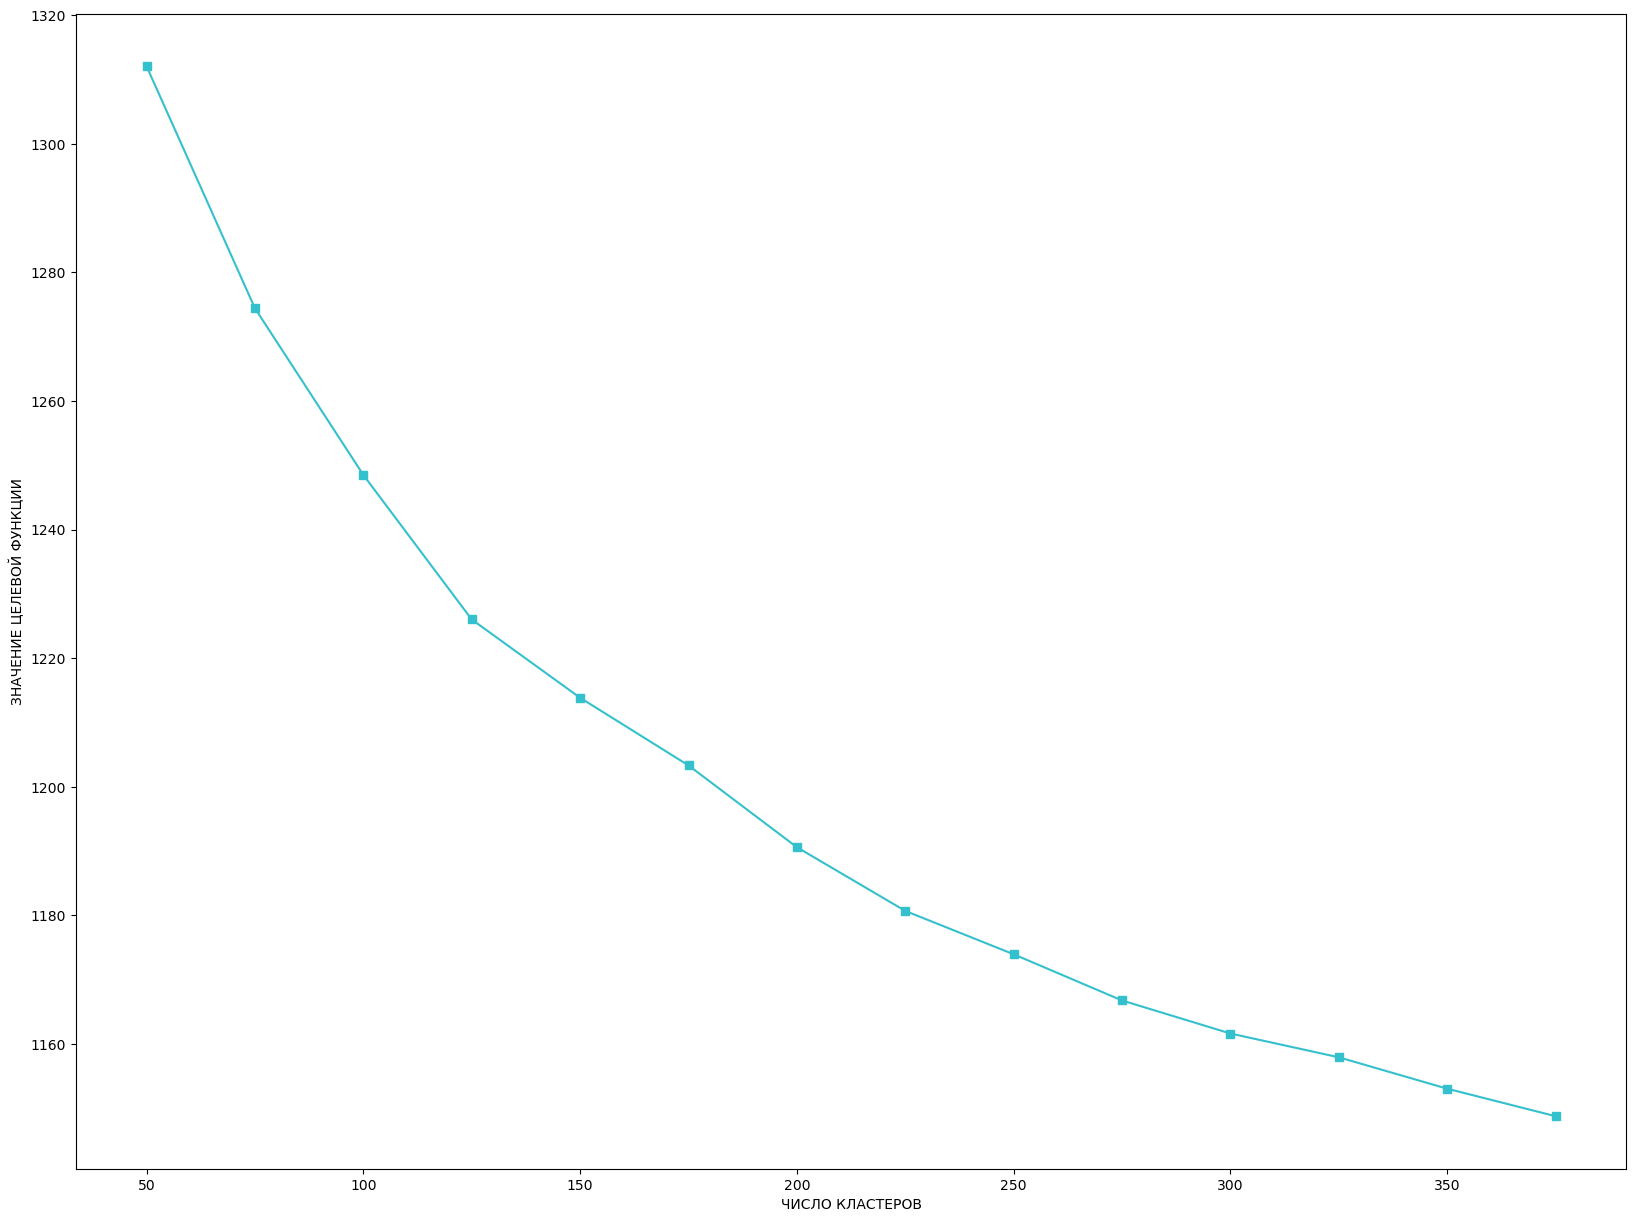

In [35]:
cluster_count(mini_base, 50,400,25)

На графике необходимо определить точку разворота линии, после которой изменение становится менее существенным. Однако, не сказать, что её здесь можно определить однозначно. Предположительно это может быть точка где-то в промежутке 210-230. Воспользуемся библиотекой silhouette_score, чтобы оценить качество кластеризации на этом промежутке.

In [36]:
def cluster_siluet(df, a, b):
    for n_cluster in range(a, b):
        kmeans = KMeans(n_clusters=n_cluster, random_state=12345).fit(df)
        label = kmeans.labels_
        sil_coeff = silhouette_score(df, label, metric='euclidean')
        print("Для n_clusters={}, коэффициент силуэта равен {}".format(n_cluster, sil_coeff))

In [37]:
cluster_siluet(mini_base, 210, 230)

Для n_clusters=210, коэффициент силуэта равен 0.062176935374736786
Для n_clusters=211, коэффициент силуэта равен 0.05977191403508186
Для n_clusters=212, коэффициент силуэта равен 0.07325863093137741
Для n_clusters=213, коэффициент силуэта равен 0.06217674911022186
Для n_clusters=214, коэффициент силуэта равен 0.06030680984258652
Для n_clusters=215, коэффициент силуэта равен 0.05937272682785988
Для n_clusters=216, коэффициент силуэта равен 0.05870235338807106
Для n_clusters=217, коэффициент силуэта равен 0.05842582881450653
Для n_clusters=218, коэффициент силуэта равен 0.05820362642407417
Для n_clusters=219, коэффициент силуэта равен 0.057493362575769424
Для n_clusters=220, коэффициент силуэта равен 0.05822853744029999
Для n_clusters=221, коэффициент силуэта равен 0.05809885263442993
Для n_clusters=222, коэффициент силуэта равен 0.05891014635562897
Для n_clusters=223, коэффициент силуэта равен 0.0590408593416214
Для n_clusters=224, коэффициент силуэта равен 0.05839074030518532
Для n_clu

В промежутке 210-230 коэффициент силуэта выше при делении на 212 кластеров. 

## Изменение количества кластеров

In [38]:
df_base_del = df_base.drop(['66', '25', '21', '33', '70', '59', '65'], axis=1)
df_train_del = df_train.drop(['66', '25', '21', '33', '70', '59', '65'], axis=1)

### Масштабирование

In [39]:
df_base_del_scaler = scaler.fit_transform(df_base_del)

In [40]:
df_train_del_scaler = scaler.transform(df_train_del)

### Построение алгоритма

За оптимальное количество кластеров примем 212. Также подберём оптимальное значение nprobe.

In [41]:
dims = df_base_del_scaler.shape[1] # размер индексных векторов
n_cells = 212 #количество кластеров
quantizer_del = faiss.IndexFlatL2(dims) # индекс для присвоения векторов определенному кластеру
idx_l2 = faiss.IndexIVFFlat(quantizer_del, dims, n_cells)

In [42]:
idx_l2.nprobe = 180

In [43]:
idx_l2.train(np.ascontiguousarray(df_base_del_scaler[:60000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(df_base_del_scaler).astype('float32'))

In [44]:
base_index = {l: v for l, v in enumerate(df_base_del.index.to_list())}

In [45]:
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train_del_scaler).astype('float32'), k)

In [46]:
acc = 0
for target, el in zip(targets_train.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

71.426


## Вывод

На данном этапе мы попытались разработать оптимальную по скорости и качеству модель. Протестировали предложенные на этапе EDA шаги. Для обучения взяли библиотеку FAISS, а для масштабирования признаков использовали RobustScaler. Метрика после разработки алгоритма на данном шаге составила 44.781%. 

Далее удалили признаки с нессиметричным распределением и признаки, которые стояли на последнем месте по важности: 21, 25, 33, 70, 59, 65. После этого оценка метрики поднялась до 64.182%. Попытка удалить выбросы ни к чему не привела. Удаление мультиколлинеарного признака 66 дало прирост оценки до 64.214%. 

Перешли к определению оптимального количества кластеров с помощью метода "локтя". Определили, что оптимальное количество кластеров может быть где-то в промежутке от 210 до 230.  Воспользовались библиотекой silhouette_score, чтобы оценить качество кластеризации на этом промежутке. Самый высокий коэффициент силуэта оказался при делении на 212 кластеров - 0.073, поэтому при разработке алгоритма набор данных решили делить на 212 кластеров. Далее подобрали количество посещаемых кластеров - 180. С такими значениями оценка метрики поднялась до 71.426%. 

На следующем этапе применим построенный алгоритм на тестовых данных.